In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/jpgill86/python-for-neuroscientists/master/notebooks/homework/data/JG08-foods-BN2-force.csv"
data = pd.read_csv(url)
print(data.head())

         Food  BN2 burst duration (s)  BN2 burst mean rectified voltage (μV)  \
0  Fresh food                5.104272                               3.701231   
1  Fresh food                4.578123                               3.720747   
2  Fresh food                4.394745                               5.837415   
3  Fresh food                2.560961                               5.651309   
4  Fresh food                2.206877                               4.842579   

   Force peak (mN)  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  


In [ ]:
data= data.drop(columns=['Force peak (mN)']) #we drop the force peak column so we do not have our output affected by the na values
print(data.head(106))

             Food  BN2 burst duration (s)  \
0      Fresh food                5.104272   
1      Fresh food                4.578123   
2      Fresh food                4.394745   
3      Fresh food                2.560961   
4      Fresh food                2.206877   
..            ...                     ...   
101  Two-ply nori                2.499032   
102  Two-ply nori                3.995593   
103  Two-ply nori                2.750376   
104  Two-ply nori                2.956192   
105  Two-ply nori                2.247271   

     BN2 burst mean rectified voltage (μV)  
0                                 3.701231  
1                                 3.720747  
2                                 5.837415  
3                                 5.651309  
4                                 4.842579  
..                                     ...  
101                               7.746846  
102                               5.207140  
103                               5.686245  
104      

In [ ]:
#Fresh Food is our baseline
import pandas as pd
import numpy as np

data_one_hot = pd.get_dummies(data['Food'], prefix='Food')

data_one_hot.drop(columns=['Food_Tape nori'], inplace=True)

dataHot = pd.concat([data, data_one_hot], axis=1)

df = dataHot



#data_one_hot = pd.get_dummies(data['Food'], prefix='Food')
#data_one_hot.drop(columns=['Tape Nori'], inplace=True)
#dataHot = pd.concat([data, data_one_hot], axis=1)
#df = dataHot.drop(columns=['Food'])
print("DataFrame after One-Hot Encoding with Tape Nori as Baseline:")
print(df.head())


DataFrame after One-Hot Encoding with Tape Nori as Baseline:
         Food  BN2 burst duration (s)  BN2 burst mean rectified voltage (μV)  \
0  Fresh food                5.104272                               3.701231   
1  Fresh food                4.578123                               3.720747   
2  Fresh food                4.394745                               5.837415   
3  Fresh food                2.560961                               5.651309   
4  Fresh food                2.206877                               4.842579   

   Food_Fresh food  Food_Regular nori  Food_Two-ply nori  
0             True              False              False  
1             True              False              False  
2             True              False              False  
3             True              False              False  
4             True              False              False  


In [ ]:

df = df.rename(columns={
      'BN2 burst duration (s)': 'BN2_burst_duration',
          'BN2 burst mean rectified voltage (μV)': 'BN2_burst_mean_voltage',
              'Food_Regular nori': 'Food_Regular_nori',
                  'Food_Fresh food': 'Food_Fresh_Food',
                      'Food_Two-ply nori': 'Food_Two_ply_nori',

                      })
print(df.head())

         Food  BN2_burst_duration  BN2_burst_mean_voltage  Food_Fresh_Food  \
0  Fresh food            5.104272                3.701231             True   
1  Fresh food            4.578123                3.720747             True   
2  Fresh food            4.394745                5.837415             True   
3  Fresh food            2.560961                5.651309             True   
4  Fresh food            2.206877                4.842579             True   

   Food_Regular_nori  Food_Two_ply_nori  
0              False              False  
1              False              False  
2              False              False  
3              False              False  
4              False              False  


In [ ]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model = smf.ols('BN2_burst_mean_voltage ~ BN2_burst_duration + Food_Regular_nori + Food_Fresh_Food + Food_Two_ply_nori ', data = df).fit()
print("Coefficients of the Model:")
print(model.params)

Coefficients of the Model:
Intercept                    0.779662
Food_Regular_nori[T.True]   -0.033109
Food_Fresh_Food[T.True]      2.119725
Food_Two_ply_nori[T.True]    3.487064
BN2_burst_duration           0.785341
dtype: float64


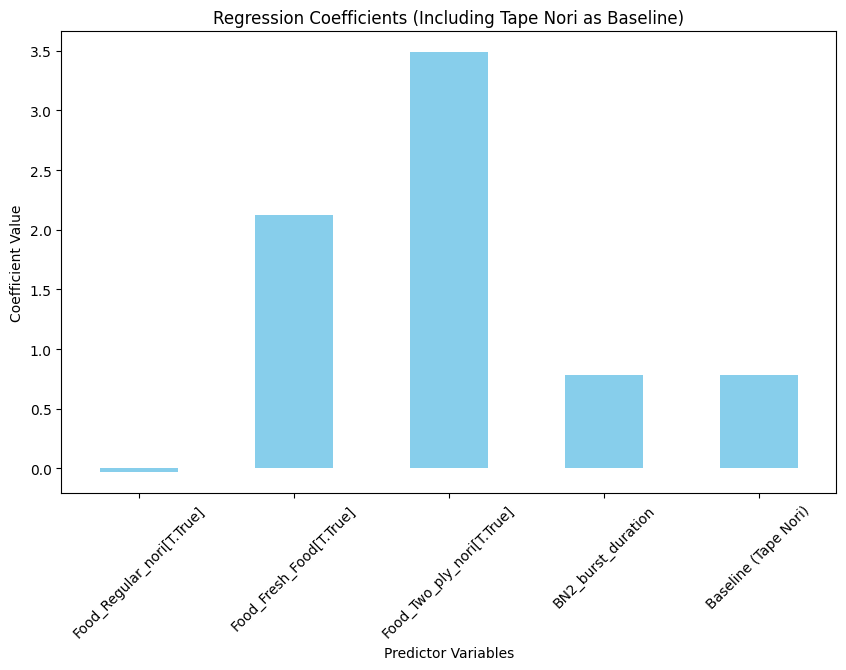

In [ ]:
coefficients = model.params
coefficients_with_baseline = coefficients.copy()
coefficients_with_baseline['Baseline (Tape Nori)'] = model.params['Intercept']  # Add intercept explicitly

# Drop the intercept (already included as "Baseline (Fresh Food)")
coefficients_with_baseline = coefficients_with_baseline.drop('Intercept')

# Bar plot for coefficients including baseline
plt.figure(figsize=(10, 6))
coefficients_with_baseline.plot(kind='bar', color='skyblue')
plt.title("Regression Coefficients (Including Tape Nori as Baseline)")
plt.xlabel("Predictor Variables")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.show()


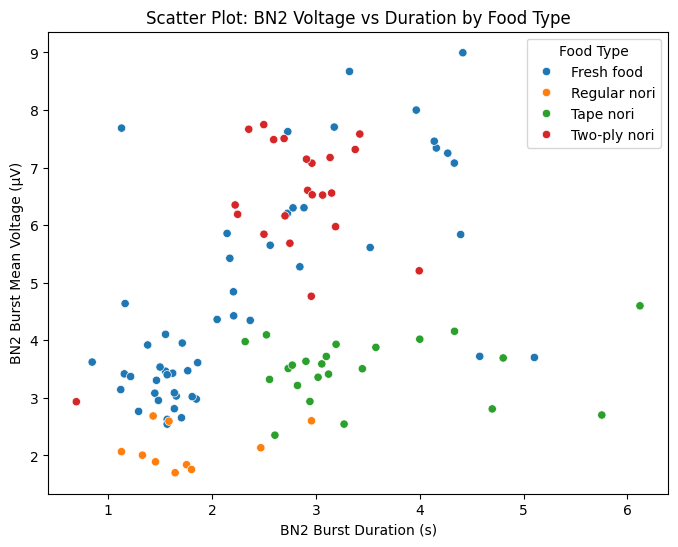

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BN2_burst_duration', y='BN2_burst_mean_voltage', hue='Food', data=df)
plt.title("Scatter Plot: BN2 Voltage vs Duration by Food Type")
plt.xlabel("BN2 Burst Duration (s)")
plt.ylabel("BN2 Burst Mean Voltage (μV)")
plt.legend(title="Food Type")
plt.show()

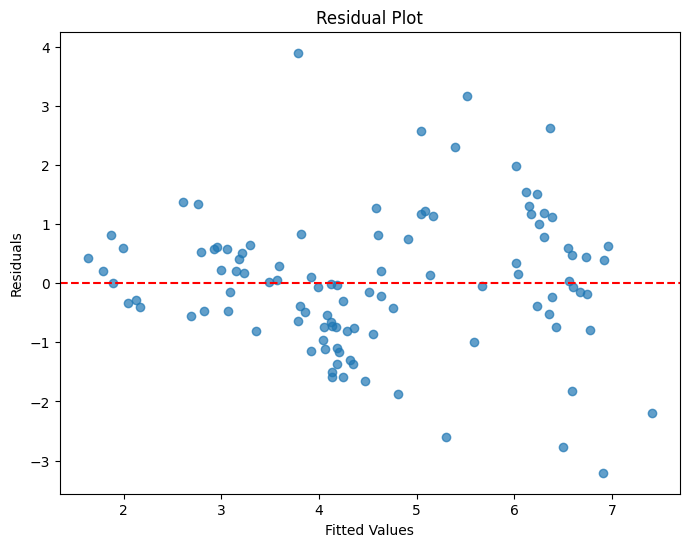

In [ ]:
y_pred = model.predict(df)
residuals = df['BN2_burst_mean_voltage'] - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [ ]:
square_error = np.sum(residuals**2)
r_squared = 1 - (square_error/np.sum((df['BN2_burst_mean_voltage'] - np.mean(df['BN2_burst_mean_voltage']))**2))
print("R-squared:", r_squared)

R-squared: 0.6098620959021801
